<a href="https://colab.research.google.com/github/kennedot/Github-and-Jupyter-setup/blob/main/Final_Project_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# root_dir is the path to your My_Drive folder.
root_dir = "/content/drive/My Drive/"

# i'm storing the data folder in the Colab Notebooks directory at the top level of the Google Drive
data_folder = root_dir + "Colab Notebooks/replication_package/2input_data/"

# change directory to the data folder
os.chdir(data_folder)

Mounted at /content/drive


In [ ]:
def dta_to_csv(dta_file_path):
  """
  takes a path to a .dta file and converts it to a .csv. The result
  is stored a subdirectory of the original directory named "/csv".

  Arguments:
    dta_file_path: Full path to the .dta file

  """

  # get the directory and file name from the full path
  directory_name, file_name = os.path.split(dta_file_path)

  # read the .dta file into a pandas DataFrame
  print("Converting file", dta_file_path)
  data = pd.io.stata.read_stata(dta_file_path)

  # save the DataFrame as a ".csv" to the "csv" directory in the original path (directory_name).
  # And get rid of the ".dta" by slicing the file_name
  data.to_csv(directory_name + "/csv/" +  file_name[:-4] +  ".csv")

In [ ]:
def convert_all_dta_to_csv(data_folder):
  """
  Traverse the directory that has path name data_folder. Look for
  .dta files and call dta_to_csv() to convert them to .csv
  """

  # Walk the directory structure
  for root, direc, files in os.walk(data_folder):
    for file in files:
      file_path = os.path.join(root, file)

      # split the file into its name and extension
      filename, extension = os.path.splitext(file)

      # does the file have a .dta extension
      if extension.lower() == ('.dta'):
        dir_path = root # store current directory

        # Create a 'csv' subdirectory if it doesn't exist
        csv_dir_path = os.path.join(dir_path, 'csv')
        if not os.path.exists(csv_dir_path):
          os.makedirs(csv_dir_path)

        # call the conversion function
        dta_to_csv(file_path)

# call the function to do the conversion
convert_all_dta_to_csv(data_folder)

Converting file /content/drive/My Drive/Colab Notebooks/replication_package/2input_data/brfss_2017.dta
Converting file /content/drive/My Drive/Colab Notebooks/replication_package/2input_data/redemption_data.dta
Converting file /content/drive/My Drive/Colab Notebooks/replication_package/2input_data/main_survey_attrit_info.dta
Converting file /content/drive/My Drive/Colab Notebooks/replication_package/2input_data/main_survey.dta
Converting file /content/drive/My Drive/Colab Notebooks/replication_package/2input_data/sender_rating_survey.dta


In [ ]:
main_survey_data = pd.read_csv(data_folder + "csv/main_survey.csv")

Confirming that the data has been converted to a csv DataFrame

In [ ]:
main_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Columns: 165 entries, Unnamed: 0 to resp_any_med
dtypes: float64(67), int64(70), object(28)
memory usage: 3.6+ MB


In [ ]:
main_survey_data.head()

,Unnamed: 0,id,authority,video_length,video_race,el_status,el_progress,el_durationinseconds,el_finished,el_responseid,...,area_division,region,region_num,region_midwest,region_northeast,region_south,region_west,missing_region,resp_no_med,resp_any_med
0,0,18197,doc,long,white,NaN,NaN,NaN,NaN,R_6LsRVVTs2vjptgl,...,West South Central,South,South,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,5465,doc,short,white,NaN,NaN,NaN,NaN,R_2P0vAZKzXespjdQ,...,West South Central,South,South,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2,7534,doc,short,white,NaN,NaN,NaN,NaN,R_10ryZI0l77UTzwy,...,South Atlantic,South,South,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,3,5456,lay,short,black,NaN,NaN,NaN,NaN,R_2tL0vrhh2xYKLKL,...,West North Central,Midwest,Midwest,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,4758,doc,long,white,NaN,NaN,NaN,NaN,R_2v8J0lMeEAma2rt,...,Middle Atlantic,Northeast,Northeast,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
main_survey_data.shape

(2893, 165)

In [ ]:
main_survey_data.describe()

,Unnamed: 0,id,el_status,el_progress,el_durationinseconds,el_finished,el_flushot,el_liklihood_prior,el_reaction_prior_14,el_coupon_family_friend,...,actor_age,mturk_se,statefips,region_midwest,region_northeast,region_south,region_west,missing_region,resp_no_med,resp_any_med
count,2893.000000,2893.000000,665.0,665.0,665.000000,665.0,665.000000,529.000000,665.000000,144.000000,...,2893.000000,2847.000000,2879.000000,2879.000000,2879.00000,2879.000000,2879.000000,2893.000000,2893.00000,2893.00000
mean,1446.000000,11430.949188,0.0,100.0,1390.007519,1.0,1.750376,4.521739,32.030075,5.527778,...,43.929831,0.482965,28.663077,0.209448,0.14901,0.520320,0.121223,0.004839,0.73868,0.26132
std,835.281489,4927.858611,0.0,0.0,15655.434822,0.0,0.433121,3.636411,29.935256,0.500970,...,8.611300,0.798568,15.517338,0.406985,0.35616,0.499674,0.326443,0.069408,0.43943,0.43943
min,0.000000,3882.000000,0.0,100.0,101.000000,1.0,1.000000,0.000000,0.000000,5.000000,...,30.000000,-1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,723.000000,7434.000000,0.0,100.0,221.000000,1.0,2.000000,1.000000,3.000000,5.000000,...,38.000000,0.000000,13.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000
50%,1446.000000,10444.000000,0.0,100.0,303.000000,1.0,2.000000,5.000000,26.000000,6.000000,...,42.000000,1.000000,29.000000,0.000000,0.00000,1.000000,0.000000,0.000000,1.00000,0.00000
75%,2169.000000,15538.000000,0.0,100.0,416.000000,1.0,2.000000,8.000000,58.000000,6.000000,...,51.000000,1.000000,42.000000,0.000000,0.00000,1.000000,0.000000,0.000000,1.00000,1.00000
max,2892.000000,20809.000000,0.0,100.0,355384.000000,1.0,2.000000,10.000000,100.000000,6.000000,...,59.000000,1.000000,56.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.00000


In [ ]:
main_survey_data.info('columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 165 columns):
 #    Column                         Dtype  
---   ------                         -----  
 0    Unnamed: 0                     int64  
 1    id                             int64  
 2    authority                      object 
 3    video_length                   object 
 4    video_race                     object 
 5    el_status                      float64
 6    el_progress                    float64
 7    el_durationinseconds           float64
 8    el_finished                    float64
 9    el_responseid                  object 
 10   el_flushot                     float64
 11   el_liklihood_prior             float64
 12   el_reaction_prior_14           float64
 13   el_coupon_family_friend        float64
 14   el_gender_recall               float64
 15   el_race_recall                 float64
 16   el_authority_recall            float64
 17   el_sick                        

# QUESTION 1 Data Cleaning Code
Do regional, pharmacy promixity, and/or racial differences predict vaccination hesitancy within a population?

This code calls for columns **pharmacy_lookup, treatment_group, covid_vaccine_intent, pharmacy_distance, likelyshot_pre, risk_pre, health_insurance, likelyshot_post,** and regional data: **region_midwest, region_northeast, region_south,** and **region_west**

In [ ]:
df = main_survey_data
question_1 = df[['pharmacy_lookup', 'treatment_group', 'covid_vaccine_intent_1', 'pharmacy_distance', 'health_insurance', 'region_midwest', 'region_northeast', 'region_south', 'region_west']].copy()
question_1.head(15)

#if this is done correctly, just needs to edit NaN outputs

,pharmacy_lookup,treatment_group,covid_vaccine_intent_1,pharmacy_distance,health_insurance,region_midwest,region_northeast,region_south,region_west
0,5.0,black white doc long,1.0,3.0,2,0.0,0.0,1.0,0.0
1,6.0,black white doc short,NaN,1.0,2,0.0,0.0,1.0,0.0
2,5.0,black white doc short,NaN,3.0,1,0.0,0.0,1.0,0.0
3,5.0,black black lay short,NaN,1.0,1,1.0,0.0,0.0,0.0
4,6.0,black white doc long,NaN,1.0,1,0.0,1.0,0.0,0.0
5,5.0,white black doc short,8.0,2.0,2,NaN,NaN,NaN,NaN
6,6.0,black black lay short,5.0,3.0,1,0.0,0.0,0.0,1.0
7,6.0,black black doc short,3.0,1.0,3,0.0,0.0,1.0,0.0
8,6.0,white black doc short,6.0,0.5,1,1.0,0.0,0.0,0.0
9,5.0,white black doc short,7.0,1.0,1,0.0,1.0,0.0,0.0


In [ ]:
question_1.value_counts('treatment_group')

,count
treatment_group,
white white doc short,614
white black doc short,607
black black lay short,430
black white doc short,417
black black doc short,415
black white doc long,410


In [ ]:
ftg1 = {
    'category': ('white white doc short', 'white black doc short', 'black black lay short', 'black white doc short', 'black black doc short', 'black white doc long'),
    'value': [1, 2, 3, 4, 5, 6]
}

ftg1 = dict(zip(ftg1['category'], ftg1['value']))

question_1['treatment_group'] = question_1['treatment_group'].map(ftg1)

print(question_1['treatment_group'].value_counts())


treatment_group
1    614
2    607
3    430
4    417
5    415
6    410
Name: count, dtype: int64


In [ ]:
question_1.isna().sum()

,0
pharmacy_lookup,2
treatment_group,0
covid_vaccine_intent_1,854
pharmacy_distance,0
health_insurance,0
region_midwest,14
region_northeast,14
region_south,14
region_west,14


In [ ]:
question_1.describe()

,pharmacy_lookup,treatment_group,covid_vaccine_intent_1,pharmacy_distance,health_insurance,region_midwest,region_northeast,region_south,region_west
count,2891.000000,2893.000000,2039.000000,2893.000000,2893.000000,2879.000000,2879.00000,2879.000000,2879.000000
mean,5.639917,3.221915,4.538990,8.877177,1.419634,0.209448,0.14901,0.520320,0.121223
std,0.480107,1.733201,3.716436,105.121416,0.549287,0.406985,0.35616,0.499674,0.326443
min,5.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,5.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000
50%,6.000000,3.000000,5.000000,2.000000,1.000000,0.000000,0.00000,1.000000,0.000000
75%,6.000000,5.000000,8.000000,5.000000,2.000000,0.000000,0.00000,1.000000,0.000000
max,6.000000,6.000000,10.000000,5280.000000,3.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
question_1['covid_vaccine_intent_1'] = pd.to_numeric(question_1['covid_vaccine_intent_1'], errors='coerce')

mean_vaccine = question_1['covid_vaccine_intent_1'].mean()
missing_vaccine_intent_count = question_1['covid_vaccine_intent_1'].isnull().sum()

question_1['covid_vaccine_intent_1'] = question_1['covid_vaccine_intent_1'].fillna(mean_vaccine)
print(f"Replaced {missing_vaccine_intent_count} missing values with the mean.")

Replaced 854 missing values with the mean.


In [ ]:
question_1['pharmacy_lookup'] = pd.to_numeric(question_1['pharmacy_lookup'])

mean_pharm = question_1['pharmacy_lookup'].mean()
missing_pharm_count = question_1['pharmacy_lookup'].isnull().sum()

question_1['pharmacy_lookup'] = question_1['pharmacy_lookup'].fillna(mean_pharm)
print(f"Replaced {missing_pharm_count} missing values with the mean.")

Replaced 2 missing values with the mean.


In [ ]:
# Decided too drop thesse 14 entries due to entries only being 1s and 0s.
question_1 = question_1.dropna(subset=['region_midwest', 'region_northeast', 'region_south', 'region_west'])

In [ ]:
#NaN check
question_1.isna().sum()

,0
pharmacy_lookup,0
treatment_group,0
covid_vaccine_intent_1,0
pharmacy_distance,0
health_insurance,0
region_midwest,0
region_northeast,0
region_south,0
region_west,0


In [ ]:
columns_to_convert = ['pharmacy_lookup', 'region_midwest', 'region_northeast', 'region_south', 'region_west']
question_1[columns_to_convert] = question_1[columns_to_convert].astype(int)
print(question_1[columns_to_convert].dtypes)

pharmacy_lookup     int64
region_midwest      int64
region_northeast    int64
region_south        int64
region_west         int64
dtype: object


In [ ]:
question_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2879 entries, 0 to 2892
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pharmacy_lookup         2879 non-null   int64  
 1   treatment_group         2879 non-null   int64  
 2   covid_vaccine_intent_1  2879 non-null   float64
 3   pharmacy_distance       2879 non-null   float64
 4   health_insurance        2879 non-null   int64  
 5   region_midwest          2879 non-null   int64  
 6   region_northeast        2879 non-null   int64  
 7   region_south            2879 non-null   int64  
 8   region_west             2879 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 224.9 KB


In [ ]:
question_1.head(15)

,pharmacy_lookup,treatment_group,covid_vaccine_intent_1,pharmacy_distance,health_insurance,region_midwest,region_northeast,region_south,region_west
0,5,6,1.00000,3.0,2,0,0,1,0
1,6,4,4.53899,1.0,2,0,0,1,0
2,5,4,4.53899,3.0,1,0,0,1,0
3,5,3,4.53899,1.0,1,1,0,0,0
4,6,6,4.53899,1.0,1,0,1,0,0
6,6,3,5.00000,3.0,1,0,0,0,1
7,6,5,3.00000,1.0,3,0,0,1,0
8,6,2,6.00000,0.5,1,1,0,0,0
9,5,2,7.00000,1.0,1,0,1,0,0
10,6,6,0.00000,15.0,1,0,0,0,1


# QUESTION 2 Data Cleaning Code
Do the video interventions produce spillover effects on broader institutional trust? Are these spillover effects strongest among subgroups with low income or limited insurance coverage?

This code calls for columns **video_length, video_race, health_insurance, income, treatment_group, rating_trust**


In [ ]:
df = main_survey_data
question_2 = df[['video_length', 'video_race', 'treatment_group', 'health_insurance', 'income', 'rating_trust']].copy()
question_2.head()


,video_length,video_race,treatment_group,health_insurance,income,rating_trust
0,long,white,black white doc long,2,4,6
1,short,white,black white doc short,2,6,5
2,short,white,black white doc short,1,5,6
3,short,black,black black lay short,1,5,5
4,long,white,black white doc long,1,1,5


In [ ]:
question_2.isna().sum() #ISNT THIS BEAUTIFUL!

,0
video_length,0
video_race,0
treatment_group,0
health_insurance,0
income,0
rating_trust,0


In [ ]:
video_race_fix = {
    'category': ('white', 'black'),
    'value': [1, 2]
}

video_race2 = dict(zip(video_race_fix['category'], video_race_fix['value']))

question_2['video_race'] = question_2['video_race'].map(video_race2)

print(question_2['video_race'].value_counts())

video_race
2    1452
1    1441
Name: count, dtype: int64


In [ ]:
video_length_fix = {
    'category': ('short', 'long'),
    'value': [1, 2]
}

video_length2 = dict(zip(video_length_fix['category'], video_length_fix['value']))

question_2['video_length'] = question_2['video_length'].map(video_length2)

print(question_2['video_length'].value_counts())

video_length
1    2483
2     410
Name: count, dtype: int64


In [ ]:
ftg2 = {
    'category': ('white white doc short', 'white black doc short', 'black black lay short', 'black white doc short', 'black black doc short', 'black white doc long'),
    'value': [1, 2, 3, 4, 5, 6]
}

ftgmap2 = dict(zip(ftg2['category'], ftg2['value']))

question_2['treatment_group'] = question_2['treatment_group'].map(ftgmap2)

print(question_1['treatment_group'].value_counts())

treatment_group
1    610
2    602
3    429
4    414
5    414
6    410
Name: count, dtype: int64


In [ ]:
question_2.head(15)

,video_length,video_race,treatment_group,health_insurance,income,rating_trust
0,2,1,6,2,4,6
1,1,1,4,2,6,5
2,1,1,4,1,5,6
3,1,2,3,1,5,5
4,2,1,6,1,1,5
5,1,2,2,2,11,5
6,1,2,3,1,2,6
7,1,2,5,3,5,5
8,1,2,2,1,2,6
9,1,2,2,1,12,6


In [ ]:
#ALL CLEAN!!!!
#NEXT STEPS:

In [ ]:
#bar chart for flu shot intent vs. covid shot intent (or at least for one)
#EDA -> bar charts, histogram (for distance)
#correlations too!
#modeling (take inputs and model them in regards to outputs) (scatter point, linear regression)
#plots box plot (start) rating_trust output, x is income (it will create two box plots to see the means to see if they are similar/different)
#maybe insurance would be easier

# TIME TO MAKE VISUALIZATIONS!!! EEEEEEEK

In [ ]:
question_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   video_length      2893 non-null   int64
 1   video_race        2893 non-null   int64
 2   treatment_group   2893 non-null   int64
 3   health_insurance  2893 non-null   int64
 4   income            2893 non-null   int64
 5   rating_trust      2893 non-null   int64
dtypes: int64(6)
memory usage: 135.7 KB


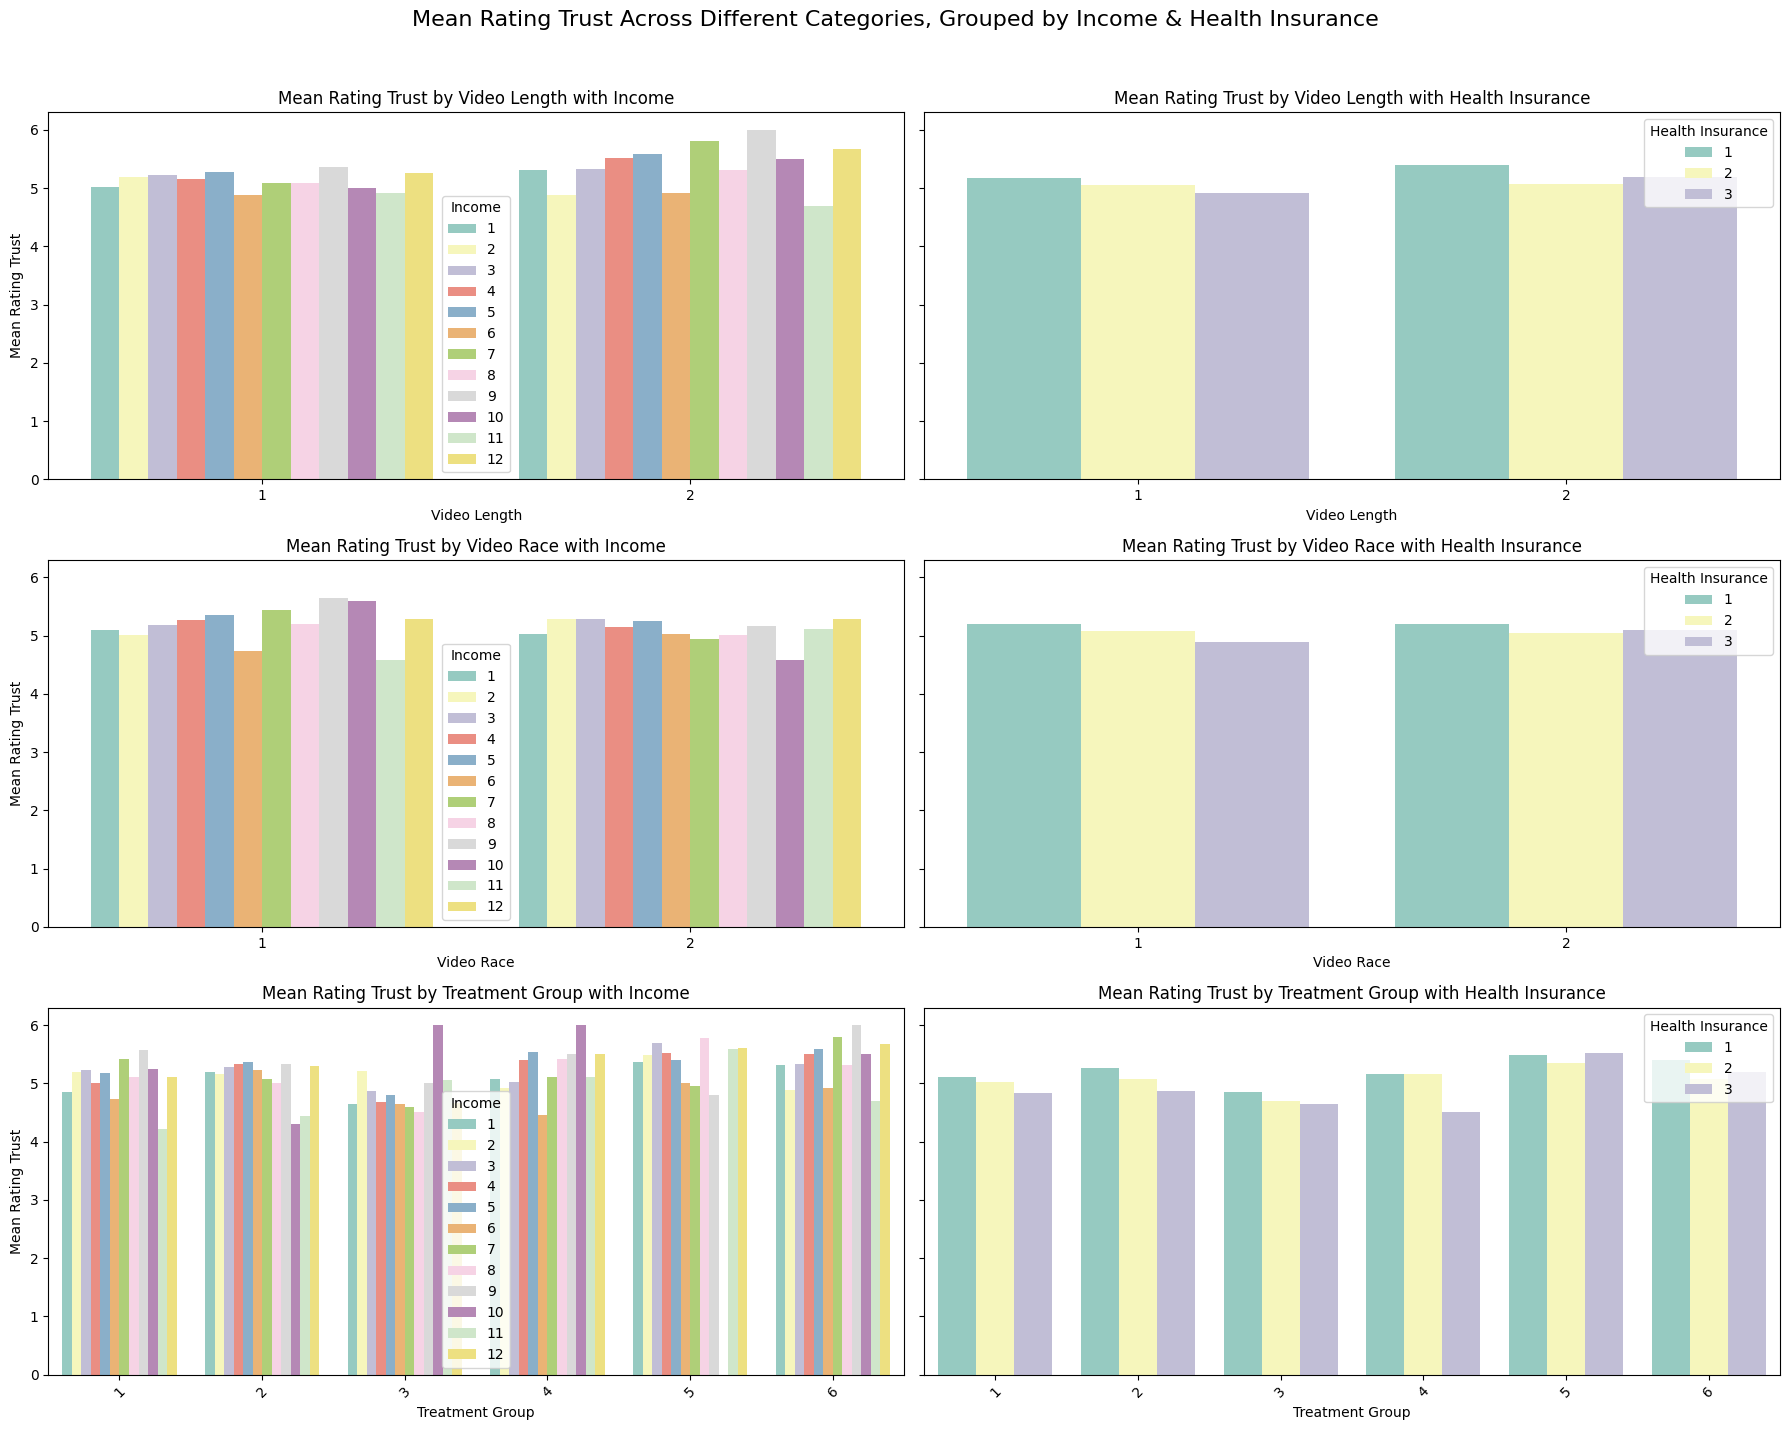

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

main_categorical_vars = ['video_length', 'video_race', 'treatment_group']
hue_categorizing_vars = ['income', 'health_insurance']
target_col = 'rating_trust'

fig, axes = plt.subplots(len(main_categorical_vars), len(hue_categorizing_vars),
                         figsize=(18, 5 * len(main_categorical_vars)), sharey=True)

if len(main_categorical_vars) == 1:
    axes = [axes]
elif len(hue_categorizing_vars) == 1:
    axes = [[ax] for ax in axes]


for i, main_col in enumerate(main_categorical_vars):
    for j, hue_col in enumerate(hue_categorizing_vars):
        ax = axes[i][j]

        mean_trust_grouped = question_2.groupby([main_col, hue_col])[target_col].mean().reset_index()

        sns.barplot(x=main_col, y=target_col, hue=hue_col, data=mean_trust_grouped, ax=ax, palette='Set3')

        ax.set_title(f'Mean {target_col.replace("_", " ").title()} by {main_col.replace("_", " ").title()} with {hue_col.replace("_", " ").title()}')
        ax.set_xlabel(main_col.replace("_", " ").title())
        ax.set_ylabel(f'Mean {target_col.replace("_", " ").title()}' if j == 0 else '')
        ax.legend(title=hue_col.replace("_", " ").title())

        if question_2[main_col].nunique() > 5:
            ax.tick_params(axis='x', rotation=45)

plt.suptitle(f"Mean {target_col.replace("_", " ").title()} Across Different Categories, Grouped by Income & Health Insurance", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

In [ ]:
question_1.describe()

,pharmacy_lookup,treatment_group,covid_vaccine_intent_1,pharmacy_distance,health_insurance,region_midwest,region_northeast,region_south,region_west
count,2879.000000,2879.000000,2879.000000,2879.000000,2879.000000,2879.000000,2879.00000,2879.000000,2879.000000
mean,5.640848,3.225773,4.530148,8.890473,1.418895,0.209448,0.14901,0.520320,0.121223
std,0.479835,1.734181,3.117289,105.374533,0.549437,0.406985,0.35616,0.499674,0.326443
min,5.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,5.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000
50%,6.000000,3.000000,4.538990,2.000000,1.000000,0.000000,0.00000,1.000000,0.000000
75%,6.000000,5.000000,6.000000,5.000000,2.000000,0.000000,0.00000,1.000000,0.000000
max,6.000000,6.000000,10.000000,5280.000000,3.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
import matplotlib.pyplot as plt

plt.bar(
    [
        question_1['pharmacy_lookup'],
        question_1['treatment_group'],
        question_1['pharmacy_distance'],
        question_1['health_insurance'],

    ],
    labels =
    [
        "Pharmacy Lookup",
        "Treatment Group",
        "Pharmacy Distance",
        "Health Insurance",
    ]
)

_ = plt.title("Distribution of Key Variables in Question 1 Data")
plt.show()

TypeError: bar() missing 1 required positional argument: 'height'

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))

x_values = list(range(1, len(baseball_positions)))
y_values = list(baseball_positions.values())


_ = plt.boxplot(
    [
        question_1['pharmacy_lookup'],
        question_1['treatment_group'],
        question_1['pharmacy_distance'],
        question_1['health_insurance'],
        question_1['region_midwest'],
        question_1['region_northeast'],
        question_1['region_south'],
        question_1['region_west']

    ],
    labels =
    [
        "Pharmacy Lookup",
        "Treatment Group",
        "Pharmacy Distance",
        "Health Insurance",
        "Region Midwest",
        "Region Northeast",
        "Region South",
        "Region West"
    ]
)

_ = plt.title("Distribution of Key Variables in Question 1 Data")
plt.show()


# plt.bar

x_values = list(range(1, len(baseball_positions) + 1))
y_values = list(baseball_positions.values())

_ = ax.bar(
    x = x_values,
    height = y_values,
    tick_label = list(baseball_positions.keys())
)

# give it a title
_ = plt.title("Baseball player positions")

# set the y-axis label
_ = plt.ylabel("Number of players")